In [1]:
!pip install nltk

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re


In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
data=pd.read_csv(r'C:\Users\hp\Downloads\sentiment_tweets3.csv.zip')

In [5]:
data.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [6]:
data.shape

(10314, 3)

In [7]:
data['label (depression result)'].unique()


array([0, 1], dtype=int64)

In [8]:
counts=data['label (depression result)'].value_counts()

In [9]:
counts

label (depression result)
0    8000
1    2314
Name: count, dtype: int64

<Axes: xlabel='label (depression result)', ylabel='count'>

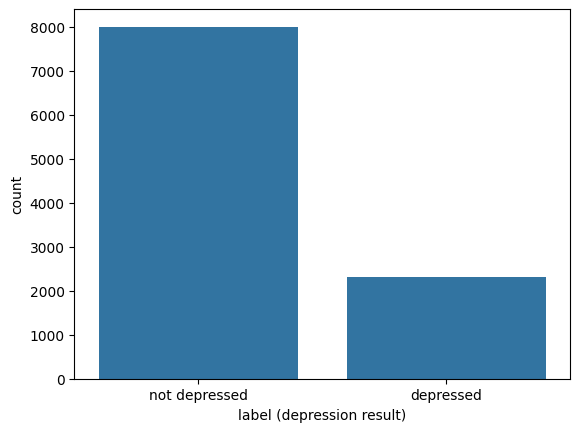

In [10]:
sns.barplot(x=counts.index.map({0:'not depressed',1:'depressed'}),y=counts)

In [11]:
data.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [12]:
data.dtypes

Index                         int64
message to examine           object
label (depression result)     int64
dtype: object

In [13]:
#train 
from sklearn.model_selection import train_test_split

In [14]:
# X=data['message to examine']
# y=data['label (depression result)']
# X_train,y_train,X_test,y_test=train_test_split(X,y, test_size=0.3,random_state=42)
# X

0        just had a real good moment. i missssssssss hi...
1               is reading manga  http://plurk.com/p/mzp1e
2        @comeagainjen http://twitpic.com/2y2lx - http:...
3        @lapcat Need to send 'em to my accountant tomo...
4            ADD ME ON MYSPACE!!!  myspace.com/LookThunder
                               ...                        
10309    No Depression by G Herbo is my mood from now o...
10310    What do you do when depression succumbs the br...
10311    Ketamine Nasal Spray Shows Promise Against Dep...
10312    dont mistake a bad day with depression! everyo...
10313                                                    0
Name: message to examine, Length: 10314, dtype: object

In [44]:

ps=PorterStemmer()
def stemming(text):
    review=re.sub('[^a-zA-Z]',' ',text)
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    return review

In [45]:
data['stemmed txt']=data['message to examine'].apply(stemming)
data.head()

,Index,message to examine,label (depression result),stemmed txt
0,106,just had a real good moment. i missssssssss hi...,0,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,read manga http plurk com p mzp e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen http twitpic com lx http www yout...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em account tomorrow oddli eve...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspac myspac com lookthund


In [46]:
data['stemmed txt']

0                       real good moment missssssssss much
1                        read manga http plurk com p mzp e
2        comeagainjen http twitpic com lx http www yout...
3        lapcat need send em account tomorrow oddli eve...
4                          add myspac myspac com lookthund
                               ...                        
10309        depress g herbo mood done stress peopl deserv
10310    depress succumb brain make feel like never enough
10311    ketamin nasal spray show promis depress suicid...
10312               dont mistak bad day depress everyon em
10313                                                     
Name: stemmed txt, Length: 10314, dtype: object

In [18]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


In [19]:
lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))

In [48]:

def lemmatizing(text):
    review=re.sub('[^a-zA-Z]',' ',text)
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in stop_words]
    review=' '.join(review)
    return review
    # data['lemmatized_message']=corpus
    # data.head()

In [50]:
data['lemmatized txt']=data['message to examine'].apply(lemmatizing)
data.head()

,Index,message to examine,label (depression result),stemmed txt,lemmatized txt
0,106,just had a real good moment. i missssssssss hi...,0,real good moment missssssssss much,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,read manga http plurk com p mzp e,reading manga http plurk com p mzp e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen http twitpic com lx http www yout...,comeagainjen http twitpic com lx http www yout...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send em account tomorrow oddli eve...,lapcat need send em accountant tomorrow oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspac myspac com lookthund,add myspace myspace com lookthunder


In [59]:
X=data['stemmed txt']
y=data['label (depression result)']
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,stratify=y,random_state=2)
X_train.shape

(7219,)

In [60]:
X_train

1996                                    sfee know hee hee
7102    killastar andi bellfluer get funni made die la...
8122    rwpusa wonder donald trump obtain provigil adm...
4166                     swear want one life good braclet
7225    ipoyzn refer namecheap contest http gd rep goo...
                              ...                        
5089     time bed nighti night hope u guy sweeet dream lt
8441    studi sexual minor adolesc higher rate depress...
6095                          lose count mani ride brandi
3036    therealjordin hahaha thought mom breath anymor...
8142                                 solitud turn depress
Name: stemmed txt, Length: 7219, dtype: object

In [61]:
X_test

7792                   drakkardnoir see tweet addict great
7050           jovenatheart cooool morn want see transform
10244                      depress kickin goodnight nobodi
4737     http twitpic com gblh new desktop majornelson ...
3752                 bounc trampolin http twitpic com cc j
                               ...                        
7928                  dri n str n th mop thn tesco nd home
7852     stupid mapl patch cannot load creat new audi a...
8036     http fyi org nz request event respons chri hip...
5896              wooohoo new cd album turn play old hi fi
8675     keep eye neurostar first nation tv ad air week...
Name: stemmed txt, Length: 3095, dtype: object

In [63]:
#text data to numerical
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [66]:
print(X_train)

  (0, 11090)	0.4738196469679042
  (0, 6871)	0.2181657143596624
  (0, 5341)	0.8531697739753494
  (1, 6797)	0.41424366088394743
  (1, 462)	0.3729479906423328
  (1, 1135)	0.41424366088394743
  (1, 4767)	0.17347371100310402
  (1, 4610)	0.26917438320984055
  (1, 7581)	0.24579322625712405
  (1, 3224)	0.30417121959459936
  (1, 7059)	0.2907186465235717
  (1, 12623)	0.24687926206325272
  (1, 3527)	0.34170902204689396
  (2, 10717)	0.24990677719988966
  (2, 13664)	0.1629380230788998
  (2, 3412)	0.24990677719988966
  (2, 12779)	0.20901240241009006
  (2, 8965)	0.22003659712952459
  (2, 9949)	0.24990677719988966
  (2, 140)	0.224993739688659
  (2, 6145)	0.23888258248045507
  (2, 11271)	0.178153422112999
  (2, 3687)	0.19336882114709822
  (2, 5882)	0.3719504254889899
  (2, 3501)	0.2122148064980287
  :	:
  (7215, 144)	0.31559478665834534
  (7215, 5430)	0.3073565339975763
  (7215, 8123)	0.32043020323302235
  (7215, 10205)	0.3112693591391
  (7215, 11084)	0.32043020323302235
  (7215, 10876)	0.3773425649647

In [118]:
print(y_test)

7792     0
7050     0
10244    1
4737     0
3752     0
        ..
7928     0
7852     0
8036     1
5896     0
8675     1
Name: label (depression result), Length: 3095, dtype: int64


In [ ]:
# training machine learning model


In [72]:
model=LogisticRegression(max_iter=100)
model.fit(X_train,y_train)

LogisticRegression()

In [76]:
X_pred=model.predict(X_train)
data_accuracy=accuracy_score(y_train,X_pred)

In [77]:
print(data_accuracy)

0.9907189361407397


In [79]:
y_pred=model.predict(X_test)
data_accuracy=accuracy_score(y_test,y_pred)

In [80]:
print(data_accuracy)

0.9864297253634895


In [81]:
import pickle

In [85]:
filename='trained_model.sav'
pickle.dump(model,open(filename,'wb'))


# using a saved model for future predictions

In [89]:
loaded_model=pickle.load(open('trained_model.sav','rb'))


In [121]:
X_new = X_test
print(y_test)
pred=loaded_model.predict(X_new)
print(pred)

if (pred[0]==0):
    print('negative tweet')
else:
    print('positive tweet')


7792     0
7050     0
10244    1
4737     0
3752     0
        ..
7928     0
7852     0
8036     1
5896     0
8675     1
Name: label (depression result), Length: 3095, dtype: int64
[0 0 1 ... 1 0 1]
negative tweet
